In [1]:
"""
Dataset: -

HTRU2 is a data set which describes a sample of 
pulsar candidates collected during the High Time Resolution Universe Survey 

Source:- 

https://archive.ics.uci.edu/ml/datasets/HTRU2

Columns:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
df = pd.read_csv('HTRU_2.csv')
X = df.drop(['Class'],axis = 1) # Inpt features
y = df['Class'] # Output class
df.head()

,MeanIP,StdIP,KurtosisIP,SkewIP,MeanDM,StdDM,KurtosisDM,SkewDM,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.describe()

,MeanIP,StdIP,KurtosisIP,SkewIP,MeanDM,StdDM,KurtosisDM,SkewDM,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [4]:
df.Class.unique()

array([0, 1])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
MeanIP        17898 non-null float64
StdIP         17898 non-null float64
KurtosisIP    17898 non-null float64
SkewIP        17898 non-null float64
MeanDM        17898 non-null float64
StdDM         17898 non-null float64
KurtosisDM    17898 non-null float64
SkewDM        17898 non-null float64
Class         17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# 1.1

In [6]:
"""Training Testing Data and Model setup"""
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report # contains TP,TN,FP,FN
from collections import defaultdict

cv_fold = 5 # 5 fold cross validation


In [7]:
""" SVM """
from sklearn.svm import SVC

svm_scores = []
svm_reg_params = [0.1,1,10] ## C in SVM
for c in svm_reg_params:
    clf_svm = SVC(kernel='linear', C=c)
    svm_scores.append(cross_validate(clf_svm,X,y,cv=cv_fold,\
                                     scoring = ('accuracy','precision','recall','f1_weighted')))
    

In [8]:
print(svm_scores)

[{'fit_time': array([3.18052912, 4.21850991, 3.54655695, 3.28855801, 2.81606817]), 'score_time': array([0.0891192 , 0.10265517, 0.09059191, 0.08712411, 0.08682489]), 'test_accuracy': array([0.97513966, 0.97821229, 0.98128492, 0.97709497, 0.97680268]), 'test_precision': array([0.96138996, 0.95620438, 0.92508143, 0.91275168, 0.95864662]), 'test_recall': array([0.75914634, 0.79878049, 0.86585366, 0.82926829, 0.77981651]), 'test_f1_weighted': array([0.97380902, 0.9773248 , 0.98100557, 0.97659871, 0.97571737])}, {'fit_time': array([19.94967914, 22.37426686, 19.58245826, 18.69032788, 17.67715907]), 'score_time': array([0.08373094, 0.09099507, 0.08518887, 0.08405304, 0.08593893]), 'test_accuracy': array([0.97541899, 0.98072626, 0.98184358, 0.97793296, 0.97764114]), 'test_precision': array([0.96153846, 0.95438596, 0.92282958, 0.91362126, 0.95910781]), 'test_recall': array([0.76219512, 0.82926829, 0.875     , 0.83841463, 0.78899083]), 'test_f1_weighted': array([0.97412481, 0.98011356, 0.9816257

In [9]:
"""Decision Tree"""
from sklearn.tree import DecisionTreeClassifier

dt_scores = []
max_depths = [3,4,6]
for d in max_depths:
    clf_dt = DecisionTreeClassifier(max_depth = d)
    dt_scores.append(cross_validate(clf_dt,X,y,cv=cv_fold,\
                                    scoring = ('accuracy','precision','recall','f1_weighted')))
  

In [10]:
print(dt_scores)

[{'fit_time': array([0.03573585, 0.03207278, 0.0321939 , 0.0318532 , 0.03196859]), 'score_time': array([0.00635123, 0.00622416, 0.00635886, 0.00632286, 0.0061183 ]), 'test_accuracy': array([0.97513966, 0.98100559, 0.97569832, 0.97430168, 0.98071548]), 'test_precision': array([0.91929825, 0.93046358, 0.85131195, 0.85329341, 0.93288591]), 'test_recall': array([0.79878049, 0.85670732, 0.8902439 , 0.86890244, 0.85015291]), 'test_f1_weighted': array([0.97434937, 0.98065145, 0.97594186, 0.97440627, 0.9803109 ])}, {'fit_time': array([0.04222393, 0.04173684, 0.04254484, 0.04170799, 0.04078293]), 'score_time': array([0.0062809 , 0.00647712, 0.00620699, 0.00608063, 0.00660229]), 'test_accuracy': array([0.97625698, 0.98184358, 0.97932961, 0.97653631, 0.98071548]), 'test_precision': array([0.94181818, 0.93979933, 0.88484848, 0.88125   , 0.94791667]), 'test_recall': array([0.78963415, 0.85670732, 0.8902439 , 0.8597561 , 0.83486239]), 'test_f1_weighted': array([0.97530951, 0.98146399, 0.97935784, 0.

In [11]:
"""Random Forests"""
from sklearn.ensemble import RandomForestClassifier

rf_scores = []
max_d = 5
num_trees = [5,11,13]
for N in num_trees:
    clf_rf = RandomForestClassifier(max_depth = max_d, n_estimators = N,random_state = 0,n_jobs = -1)
    rf_scores.append(cross_validate(clf_rf,X,y,cv=cv_fold,\
                                    scoring = ('accuracy','precision','recall','f1_weighted')))
    
   

In [12]:
print(rf_scores)

[{'fit_time': array([1.3134594 , 0.46020818, 0.48948789, 0.48490715, 0.03838491]), 'score_time': array([0.43224669, 0.43039894, 0.42996716, 0.42706299, 0.43320608]), 'test_accuracy': array([0.97625698, 0.97653631, 0.98072626, 0.9773743 , 0.97540525]), 'test_precision': array([0.96197719, 0.93884892, 0.9218241 , 0.91304348, 0.94756554]), 'test_recall': array([0.77134146, 0.79573171, 0.86280488, 0.83231707, 0.77370031]), 'test_f1_weighted': array([0.97506879, 0.97565784, 0.98043857, 0.97690128, 0.97427554])}, {'fit_time': array([0.06370616, 0.51486111, 0.06080103, 0.05668616, 0.06040883]), 'score_time': array([0.4293828 , 0.42735314, 0.43251419, 0.42832804, 0.43427205]), 'test_accuracy': array([0.97541899, 0.97932961, 0.98128492, 0.97625698, 0.97680268]), 'test_precision': array([0.95454545, 0.95035461, 0.91693291, 0.89576547, 0.95185185]), 'test_recall': array([0.76829268, 0.81707317, 0.875     , 0.83841463, 0.78593272]), 'test_f1_weighted': array([0.97421005, 0.97862282, 0.98108747, 0.

In [15]:
## Combining scores

accuracy = defaultdict(list) # ex: 'svm': [c = 0.1(mean,sd), c = 1(mean,sd), c = 10(mean,sd)] 
recall = defaultdict(list)
precision = defaultdict(list)
f1_score = defaultdict(list)

for clf in ['svm','dt','rf']:
    score = eval(clf+'_scores')
    for mets in score: #append in order
        accuracy[clf].append((round(np.mean(mets['test_accuracy']),6),round(np.std(mets['test_accuracy']),8)))
        precision[clf].append((round(np.mean(mets['test_precision']),6),round(np.std(mets['test_precision']),8)))
        recall[clf].append((round(np.mean(mets['test_recall']),6),round(np.std(mets['test_recall']),8)))
        f1_score[clf].append((round(np.mean(mets['test_f1_weighted']),6),round(np.std(mets['test_f1_weighted']),8)))
        

In [16]:
from IPython.display import HTML, display,Markdown
print("accuracy:", accuracy,'\n')
print("precision:", precision,'\n')
print("recall:", recall,'\n')
print("f1_weighted:", f1_score,'\n')

accuracy: defaultdict(<class 'list'>, {'svm': [(0.977707, 0.00204159), (0.978713, 0.0023005), (0.978768, 0.00235124)], 'dt': [(0.977372, 0.00288421), (0.978936, 0.00222311), (0.97726, 0.00289816)], 'rf': [(0.97726, 0.00184379), (0.977819, 0.00216921), (0.97793, 0.00173177)]}) 

precision: defaultdict(<class 'list'>, {'svm': [(0.942815, 0.01996611), (0.942297, 0.02000129), (0.940509, 0.02080982)], 'dt': [(0.897451, 0.03715231), (0.919127, 0.02959988), (0.905393, 0.03978354)], 'rf': [(0.936652, 0.01756431), (0.93389, 0.02350056), (0.932267, 0.02470105)]}) 

recall: defaultdict(<class 'list'>, {'svm': [(0.806573, 0.0375638), (0.818774, 0.03935849), (0.821215, 0.03907067)], 'dt': [(0.852957, 0.03033675), (0.846241, 0.03335346), (0.84258, 0.03116225)], 'rf': [(0.807179, 0.03539026), (0.816943, 0.03784218), (0.819997, 0.03425809)]}) 

f1_weighted: defaultdict(<class 'list'>, {'svm': [(0.976891, 0.00236978), (0.978004, 0.00263408), (0.978087, 0.00266407)], 'dt': [(0.977132, 0.00279575), (0.97

In [17]:
acc = pd.DataFrame.from_dict(accuracy)
print("Rows are in the order of Increasing parameters as given in the Homework PS")
display(Markdown('**Accuracy: (Mean, SD)**'))
acc

Rows are in the order of Increasing parameters as given in the Homework PS


**Accuracy: (Mean, SD)**

,svm,dt,rf
0,"(0.977707, 0.00204159)","(0.977372, 0.00288421)","(0.97726, 0.00184379)"
1,"(0.978713, 0.0023005)","(0.978936, 0.00222311)","(0.977819, 0.00216921)"
2,"(0.978768, 0.00235124)","(0.97726, 0.00289816)","(0.97793, 0.00173177)"


In [18]:
pre = pd.DataFrame.from_dict(precision)
print("Rows are in the order of Increasing parameters as given in the Homework PS")
display(Markdown('**Precision: (Mean, SD)**'))
pre

Rows are in the order of Increasing parameters as given in the Homework PS


**Precision: (Mean, SD)**

,svm,dt,rf
0,"(0.942815, 0.01996611)","(0.897451, 0.03715231)","(0.936652, 0.01756431)"
1,"(0.942297, 0.02000129)","(0.919127, 0.02959988)","(0.93389, 0.02350056)"
2,"(0.940509, 0.02080982)","(0.905393, 0.03978354)","(0.932267, 0.02470105)"


In [19]:
rec = pd.DataFrame.from_dict(recall)
print("Rowas are in the order of Increasing parameters as given in the Homework PS")
display(Markdown('**Recall: (Mean, SD)**'))
rec

Rowas are in the order of Increasing parameters as given in the Homework PS


**Recall: (Mean, SD)**

,svm,dt,rf
0,"(0.806573, 0.0375638)","(0.852957, 0.03033675)","(0.807179, 0.03539026)"
1,"(0.818774, 0.03935849)","(0.846241, 0.03335346)","(0.816943, 0.03784218)"
2,"(0.821215, 0.03907067)","(0.84258, 0.03116225)","(0.819997, 0.03425809)"


In [20]:
f1s = pd.DataFrame.from_dict(f1_score)
print("Rowas are in the order of Increasing parameters as given in the Homework PS")
print("This metric accounts forlabel imbalance by appropriately weighing labels")
display(Markdown('**f1_score Weighted: (Mean, SD)**'))
f1s

Rowas are in the order of Increasing parameters as given in the Homework PS
This metric accounts forlabel imbalance by appropriately weighing labels


**f1_score Weighted: (Mean, SD)**

,svm,dt,rf
0,"(0.976891, 0.00236978)","(0.977132, 0.00279575)","(0.976468, 0.00216214)"
1,"(0.978004, 0.00263408)","(0.97854, 0.00231683)","(0.977124, 0.00243729)"
2,"(0.978087, 0.00266407)","(0.976912, 0.00280199)","(0.977275, 0.00194198)"


# 1.2

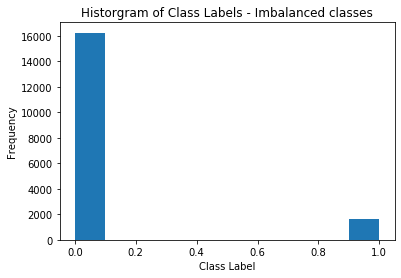

In [21]:
plt.hist(df['Class'])
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Historgram of Class Labels - Imbalanced classes')
plt.show()

1. We see that the classes are highly imbalanced, non pulsar objects are in large number compared to pulsar objects. So even if the predicted predicts all samples as "not a pulsar (0)" the accuracy will be greater than **~90%** <br>

2. Whereas **precision** and **recall** are more dependent on **True Positives (TP)** i.e. classiying Pulsars correctly (True) as Pulsars (1).

# 1.3

The best classifier is **SVM (C = 10)** though others are very close in terms of F1_weighted score. I used F1_Weighted as the scoring metric. This metric accounts for label imbalance by appropriately weighing labels.